In [7]:
import pandas as pd

# load in training data
df = pd.read_csv('train.csv')

# peek at data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# make a copy of the data
data = df.copy()


In [9]:
# identify useful "features" and prepare them for modeling
# sex (male = 0, female = 1)
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# age (fill in missing values with the median)
# using median instead of mean to avoid outliers
# use cases:
#   mean: if data is evenly distributed and clean
#   median: if data is skewed or has outliers
data["Age"] = data["Age"].fillna(data["Age"].median())
# fillna fills in missing values with whatever is passed in

# select features to use
features = ["Pclass", "Sex", "Age"]
x = data[features] # this basically makes a new table called x which only has the features we want to use
y = data["Survived"] # this is the target variable we want to predict (correct answers)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into training and validation sets
# 80% into train=training, 20% val=validation
# test_size=0.2 means 20% of the data is used for validation
# random_state=42 is used to make the split reproducible
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# create and train the model
# RandomForestClassifier is a type of ensemble model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# predict and evaluate
predictions = model.predict(x_val)
accuracy = accuracy_score(y_val, predictions)

print(f"Accuracy: {accuracy}") # print accuracy to 2 decimal places

Accuracy: 0.7821229050279329


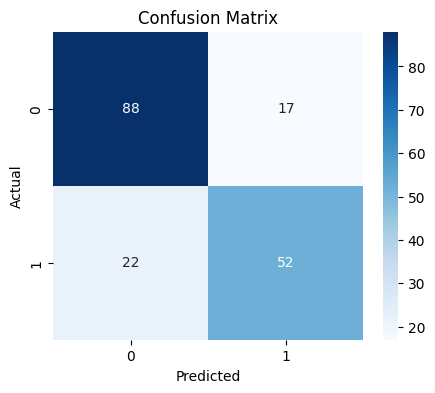

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_val, predictions)

# Plot it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
